In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
data_normalized = pd.read_csv('/content/drive/MyDrive/Đồ án 1/Test/data_balanced.csv')
data_normalized

,STT,content,sentiment
0,0,"Hình thức đẹp, còn nguyên màng co. Nội dung th...",0
1,1,Với mỗi tác phẩm của chú Nguyễn Nhật Ánh mình ...,1
2,2,Truyện này của nguyễn nhật ánh khác hẳn với nh...,1
3,3,"Truyện viết nhẹ nhàng, dí dỏm. Ngôn ngữ trong ...",0
4,4,"Mua sách ngay 11/11, hẹn 1 tuần có mà mới 1 ng...",1
...,...,...,...
979,988,"Giấy quá mỏng, chỉ dùng in tạm chứ nếu dùng in...",0
980,989,"Giấy ổn, giao hàng nhanh, đóng gói tiết kiệm, ...",0
981,990,chưa đọc nên không biết ra sao nhưng cảm thấy ...,0
982,991,Truyện thì chưa đọc nên chưa biết nội dung như...,0


In [4]:
data_normalized = data_normalized.drop('STT', axis = 1)
data_normalized

,content,sentiment
0,"Hình thức đẹp, còn nguyên màng co. Nội dung th...",0
1,Với mỗi tác phẩm của chú Nguyễn Nhật Ánh mình ...,1
2,Truyện này của nguyễn nhật ánh khác hẳn với nh...,1
3,"Truyện viết nhẹ nhàng, dí dỏm. Ngôn ngữ trong ...",0
4,"Mua sách ngay 11/11, hẹn 1 tuần có mà mới 1 ng...",1
...,...,...
979,"Giấy quá mỏng, chỉ dùng in tạm chứ nếu dùng in...",0
980,"Giấy ổn, giao hàng nhanh, đóng gói tiết kiệm, ...",0
981,chưa đọc nên không biết ra sao nhưng cảm thấy ...,0
982,Truyện thì chưa đọc nên chưa biết nội dung như...,0


In [5]:
data_normalized['sentiment'].unique()

array([ 0,  1, -1])

In [6]:
data_normalized['sentiment'].value_counts()

-1    334
 0    329
 1    321
Name: sentiment, dtype: int64

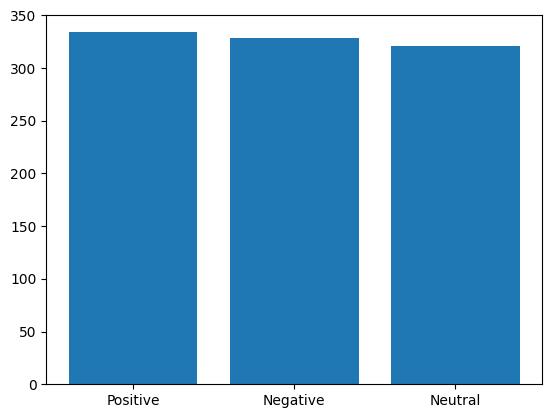

In [7]:
sentiment = ['Positive', 'Negative', 'Neutral']
counts = data_normalized['sentiment'].value_counts()

plt.bar(sentiment, counts)
plt.show()

In [8]:
!pip install pyvi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 101.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.5/993.5 kB 73.8 MB/s eta 0:00:00


In [9]:
import re
from pyvi import ViTokenizer
from pyvi import ViUtils

In [10]:
!pip install underthesea

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.2/19.2 MB 66.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 657.8/657.8 kB 46.0 MB/s eta 0:00:00


In [11]:
'''import re
import string
import pickle
from spacy.lang.vi import Vietnamese
nlp = Vietnamese()
from spacy.lang.vi import STOP_WORDS
stop = STOP_WORDS
from nltk.tokenize.treebank import TreebankWordDetokenizer
from underthesea import word_tokenize'''

'import re\nimport string\nimport pickle\nfrom spacy.lang.vi import Vietnamese\nnlp = Vietnamese()\nfrom spacy.lang.vi import STOP_WORDS\nstop = STOP_WORDS\nfrom nltk.tokenize.treebank import TreebankWordDetokenizer\nfrom underthesea import word_tokenize'

In [12]:
uniChars = "àáảãạâầấẩẫậăằắẳẵặèéẻẽẹêềếểễệđìíỉĩịòóỏõọôồốổỗộơờớởỡợùúủũụưừứửữựỳýỷỹỵÀÁẢÃẠÂẦẤẨẪẬĂẰẮẲẴẶÈÉẺẼẸÊỀẾỂỄỆĐÌÍỈĨỊÒÓỎÕỌÔỒỐỔỖỘƠỜỚỞỠỢÙÚỦŨỤƯỪỨỬỮỰỲÝỶỸỴÂĂĐÔƠƯ"
unsignChars = "aaaaaaaaaaaaaaaaaeeeeeeeeeeediiiiiooooooooooooooooouuuuuuuuuuuyyyyyAAAAAAAAAAAAAAAAAEEEEEEEEEEEDIIIOOOOOOOOOOOOOOOOOOOUUUUUUUUUUUYYYYYAADOOU"

def loaddicchar():
    dic = {}
    char1252 = 'à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ'.split(
        '|')
    charutf8 = "à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ".split(
        '|')
    for i in range(len(char1252)):
        dic[char1252[i]] = charutf8[i]
    return dic
dicchar = loaddicchar()

In [13]:
def convert_unicode(txt):
    return re.sub(
        r'à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ',
        lambda x: dicchar[x.group()], txt)

In [14]:
def clean_mess(mess):
  # input: câu nhập vào của người dùng
  # return: câu đã loại bỏ special token
  mess_unic = convert_unicode(mess).lower()
  mess_rmspectoken = re.findall(r'(?i)\b[a-záàảãạăắằẳẵặâấầẩẫậéèẻẽẹêếềểễệóòỏõọôốồổỗộơớờởỡợíìỉĩịúùủũụưứừửữựýỳỷỹỵđ0-9]+\b', mess_unic)
  mess_norm = ' '.join(mess_rmspectoken)

  # Chuẩn hóa kí tự kéo dài
  mess_norm = re.sub(r'([A-Z])\1+', lambda m: m.group(1).lower(), mess_norm, flags = re.IGNORECASE)

  # Chuẩn hóa tiếng việt, thuật ngữ
  replace_list = {
  # Thuật ngữ (teencode) và các từ viết tắt
  # Tập train
  ' na ': u' nguyễn nhật ánh ', ' k ': u' không ', ' bookmark ': u' dấu trang ', ' plot twist ': u' kết thúc bất ngờ ',
  ' twist ': u' kết thúc bất ngờ ', ' kg ': u' không ', ' r ': u' rồi ', ' sx ': u' nhận ', ' ncc ': u' nhà cung cấp ',
  ' giao ship ': u' người giao hàng ', ' mousse ': u' vật liệu bảo vệ sách ', ' qh ': u' quỳnh hương ', ' shipper ': u' người giao hàng ',
  ' tks ': u' cảm ơn', ' ekip ': u' đội ngũ ', u' ngừoi ': u' người ', ' book care ': u' bảo vệ sách ',
  u' tđi ': ' tổng đài ', ' stress ': u' áp lực ', ' highly recommed ': u' rất khuyến khích ', ' xink ': u' xinh ',
  u' tô ': u' tôi ', ' bookcare ': u' bảo vệ sách ', ' hqua ': u' hôm qua ', u' đáng ': u' đánh ', ' touchlit ': u' bút tô màu đặc biệt ',
  ' ncl ': u' nói chung là ',  u' zời ': u' vời ', ' idol ': u' thần tượng ', ' cute ': u' dễ thương ',
  ' shock ': u' xóc ', ' ok ': ' hợp lý ', ' ceo ': u' giám đốc điều hành ', ' vn ': u' việt nam ', ' thanks ': u' cảm ơn ',
  ' review ': u' tóm tắt ', ' pharaoh ': u' hoàng đế ai cập', ' deadline ': u' công việc sắp hết hạn ', u' đc ': u' được ',
  ' ship ': u' giao hàng ', ' comments ': u' các câu bình luận ', u' pé pé ': u' bé bé ', u' hổng ': u' không',
  ' j ': u' gì ', ' ok ': ' đồng ý ',  ' postcard ': u' tấm bìa quảng cáo ', ' ok ': u' ổn ', ' nhma ': u' nhưng mà ',
  ' bonus ': u' thưởng ', ' blah blah ': u' vân vân ', ' tv ': u' ti vi ',  ' e ': u' em ', ' ntn ': u' như thế này ',
  ' nhg ': u' nhưng ', ' nxb ': u' nhà xuất bản ', u' đou ': u' đỡ ', ' cx ': u' cũng ', ' logic ': u' hợp lý ',
  ' dc ': u' được ', ' online ': u' trực tuyến ', u' cám ơn ': u' cảm ơn ', ' nsx ': u' nhà sản xuất ',
  u' sử lí ': u' xử lý ', ' made ': u' đến từ ', ' china ': u' trung quốc ', ' thailand ': u' thái lan ',
  ' tn thpt qg ': u' trắc nghiệm trung học phổ thông quốc gia ', ' table ': u' bảng ', ' max ': u' giá trị lớn nhất ',
  ' min ': u' giá trị nhỏ nhất ', ' sticker ': u' nhãn dán ', ' hn ': ' hà nội ', ' qg ': u' quốc gia ',
  u' hịnn ': ' xịn ', u' mn ': u' mọi người ', u' dethuong gi đau â ': u' dễ thương ', ' speedtest ': u' tốc độ kiểm tra ',
  ' test ': u' kiểm tra ', ' covid 19 ': u' dịch bệnh ', u' sức mạnh mớ ': u' sức mạnh mới ', ' kh ': ' khoa học ',
  ' app ': u' ứng dụng ', ' comment ': ' bình luận ', ' recommend ': u' khuyến khích ', ' mk ': u' mình ',
  u' hơn lag ': u' hơn là ', u' giân hờn ': u' giận hờn ', ' mjh ': u' mình ', ' cop ': u' sao chép ',
  ' to do list ': u' cách quản lý thời gian ', ' mng ': u' mọi người ', ' gg ': u' công cụ tìm kiếm ',
  u' lắm luon ': u' lắm luôn ', 'ỏh ': ' ', ' dethuong ': u' dễ thương ', u' kím ': u' kiếm ', ' , hjx ': ' ',
  ' hk ': ' không ', ' caption ': ' tiêu đề ', u' pải ': u' phải ', ' bt ': u' biết ', ' shop ': u' cửa hàng ',
  ' trend ': u' xu hướng ', ' thgian ': u' thời gian ', ' nv ': ' nhân viên ', ' hk ': ' không ', ' lm ': u' làm ',
  u' cừoi ': u' cười ', ' kon ': u' con ', ' vd ': u' ví dụ ', ' mail ': u' thư điện tử ', ' complain ': u' phàn nàn ',
  ' monh ': u' minh ', ' voucher ': u' phiếu giảm giá ', ' group ': u' nhóm ', ' sale ': u' bán hàng ', ' ndung ': u' nội dung ',
  ' how ': u' làm thế nào ', ' toẹt ': u' tuyệt ', ' seal ': u' đánh dấu ', ' dth ': ' ', ' ms ': u' mới ',
  ' rv ': u' tóm tắt ', ' audio ': u' bản nghe ', ' ebook ': u' sách điện tử ', ' nx ': u' nữa ', ' bt ': u' bài tập ',
  ' thank you so much ': u' cảm ơn rất nhiều ', ' flashcard ': u' thẻ từ vựng ', ' app ': u' ứng dụng ', ' file ': u' tệp ',
  ' perfect ': u' hoàn hảo ', ' note ': u' ghi chú ', ' mn ': u' mọi người ', ' down mood ': u' xuống cảm xúc ',
  ' 1q ': u' một quyển ', ' mood ': u' cảm xúc ', ' google translate ': u' công cụ dịch ', ' đâuf ': u' đầu ',
  ' khách hang ': u' khách hàng ', ' cod ': u' có ', ' cskh ': u' cơ sở khách hàng ', ' youtuber ': u' người sáng tạo video ',
  ' a ': u' anh ', ' trc ': u' trước ', ' best-seller ': u' bán chạy ', ' self-help ': u' hướng dẫn ', ' manga ': u' truyện tranh Nhật Bản ',
  ' standee ': u' bản trưng bày ', ' kout ': u' cao ', ' hong ': u' không ', ' mua nho ': u' mua nha ', ' t7 ': u' thứ bảy ',
  ' cn ': u' chủ nhật ', ' vote ': u' bình chọn ', ' luon ': u' luôn ', ' clg ': u' chất lượng ', ' kute ': u' dễ thương ',
  ' lun ': u' luôn ', ' 4q ': u' bốn quyển ', ' t6 ': u' thứ sáu ', ' 4 q ': u' bốn quyển ', ' p s ': u' tái bút ',
  ' bookcard ': u' thẻ sách ', ' p ': u' phải ', ' o ': u' không ', ' nx ': u' nữa ', ' mạng up ': u' mạng tải lên ',
  ' pre ord ': u' đặt trước ', ' giwof ': u' giờ ', ' thanks ': u' cảm ơn ', ' 2 quyen ': u' hai quyển ', ' mọt ': u' một ',
  ' cta ': u' chúng ta ', ' vs ': u' và ', ' pótcard ': ' bìa quảng cáo ', ' staff ': u' nhân viên ', ' ng ': u' người ',
  ' khong ': u' không ', ' kh ': u' không ', ' siu siu ': u' siêu ', ' check ': u' kiểm tra ', ' h ': u' giờ ',
  u' một bênh ': u' một bên ', u' nê ': u' nên ', ' mik ': u' mình ', ' thank ': u' cảm ơn ', u' khônh ': u' không ',
  ' tki ': u' tiki ', ' oke ': u' tốt ', ' inbox ': u' nhắn tin ', ' sp ': u' sản phẩm ', ' hthuc ': u' hình thức ',
  ' qtrinh ': u' quá trình ', ' onl ': u' trực tuyến ', ' trading ': u' thương mại ', ' mindset ': u' tư duy ',
  ' okie ': u' tốt ', ' bds ': u' bất động sản ', ' sale ': u' giảm giá ', ' p1giải ': u' phần một giải ',
  ' enneagram ': u' hệ thống phân tích tình cảm ', ' p3 ': u' phần ba ', ' p2 ': u' phần hai ', ' mbti ': ' công cụ đo lường tính cách ',
  u' cóa ': u' có ', ' vs ': u' với ', ' notes ': u' chú ý ', ' mjk ': u' mình ', ' tiế rhu ': u' tiếp thu ',
  ' love you ': u' yêu ', ' thank you i love you ': u' cảm ơn yêu ', ' pp ': u' phương pháp ', ' 1cuốn ': u' một cuốn ',
  ' 1cuộc ': u' một cuộc ', ' cammon ': u' cảm ơn ', ' hsg ': u' học sinh giỏi ', ' thpt ': u' trung học phổ thông ',
  ' siêu bưu ': u' to ', ' hk ': u' không ', ' thik ': u' thích ', ' gru ': u' những ', ' e ': u' em ', ' thế flash ': u' nhanh ',
  ' siu ': u' siêu ', ' tg ': u' thời gian ', u' khyên ': u' khuyên ', ' font ': u' phông chữ ', ' iu ': u' yêu ',
  ' order ': u' đặt ', ' series ': u' chuỗi ', ' ny ': u' người yêu ', ' teen girls ': u' các cô gái trẻ ',
  ' weibo ': u' mạng xã hội ', ' ms ': u' mới ', ' ns ': u' nói ', ' fan ': u' người hâm mộ ', ' c ': u' chuyện ',
  ' ch ': u' chuyện ', ' kp ': u' không phải ', ' cg ': u' cũng ', ' little bit hoy ': u' một chút thôi ',
  ' giao hangg ': u' giao hàng ', ' quốn ': u' cuốn ', ' trading ': u' thương mại ', ' ph ': u' phải ', ' km ': u' khuyến mãi ',
  ' best ': u' cực kỳ ', ' scan qr ': u' quét mã vạch ', ' ttck ': u' thị trường chứng khoán ', ' mã qr ': u' mã vạch ',
  ' happy live ': u' sống hạnh phúc ', ' mua cty ': u' mua tích trữ ', ' ticker ': u' nhãn dán ', ' bullet journal ': u' mục tiêu hằng ngày ',
  ' mini ': u' nhỏ ', ' notebook ': u' sổ tay ', ' trade ': u' thương mại ', ' chồi ôi ': u' trời ơi ', ' form ': u' mẫu ',
  ' covid ': u' dịch bệnh ', ' qr code ': u' mã vạch ', ' case ': u' trường hợp ', ' files ': u' tệp ',
  ' youtube ': u' trình phát video ', ' freeship ': u' miễn phí giao hàng ', ' feedback ': u' phản hồi ',
  ' hotline ': u' đường dây nóng ', ' thoy ': u' thôi ', ' ord ': u' đặt hàng ', ' hs ': u' học sinh ',
  ' tphcm ': u' thành phố hồ chí minh ', ' coupon ': u' phiếu giảm giá ', ' zui ': u' vui ', ' tp ': u' tác phẩm ',
  ' j ' : u' gì ', 'nnghi ': u' nghĩ ', ' ôi cha ': u' ôi chao ', u' tân trí ': u' tâm trí ', ' laii ': u' lại ',
  ' kh ' : u' khách hàng', ' uh ': ' ', u' vêc ': u' về ', ' cmt ' : u' bình luận ', ' vứoi ': u' với ',
  ' ngừi ': ' người ', ' âu ': u' đâu ', ' síp ': u' vận chuyển ', ' km ': u' khuyến mãi ', ' kb bnhiu ': u' không biết bao nhiêu ',
  ' best seller ': u' bán chạy nhất ', ' nôiij ': u' nội ', ' bh ': u' bao giờ ', ' rev ': u' tóm tắt ', ' m ': u' mình ',
  ' xog ': u' xong ', ' news feed ': u' bảng tin ', ' like ': u' thích ', ' unbox ': u' mở hộp ', ' nd ': u' nội dung ',
  ' love ': u' yêu ', ' nc ': u' nói chung ', u' đătj ': u' đặt ', u' chuyênh ': u' chuyện ', ' coffee ': u' tiệm cà phê ',
  ' chill ': u' thư thái ', ' vintage ': u' cổ điển ', ' t ': u' tôi ', ' packaching ': u' đóng gói ', ' mt ': u' môi trường ',
  ' th ': u' thì ', ' onl ': u' trực tuyến ', ' best ': u' tốt nhất ', ' sd ': u' sử dụng ', ' de kiu ': u' quá ',
  ' hehe just kidding ': u' đùa thôi ', ' sales ': u' giảm giá ', ' book care ': u' bảo vệ sách ', ' rate ': u' đánh giá ',
  ' pùn ': u' buồn ', 'search ': u' tra cứu ', 'mk ': u' mình ', ' trg ': u' trong ', ' chast ': u' chất ',
  ' keke ': ' ', ' chrome ': ' ', u' ôg ': u' ông ', u' cũg ': u' cũng ', u' tẻ ': u' rẻ ', ' palette ': u' bảng màu ',
  u' đpej ': u' đẹp ', ' rose bengal ': u' hoa hồng ', ' test ': u' kiểm tra ', ' oki ': u' hợp lý ', ' thik ': u' thích ',
  ' delay ': u' chậm trễ ', ' patv ': u' phiên âm tiếng việt ', ' chug ': u' chung ', ' out ': u' văng ',
  u' hỉu ': u' hiểu ', u' viêtd ': u' viết ', ' post card ': u' thẻ sách ', ' th khảo': u' tham khảo ', ' it s easy': u' thật dễ dàng ',
  ' toxic ': u' tiêu cực ', ' clb ': u' câu lạc bộ ', ' diet': u' diệt ', ' ngy ': u' người yêu ', 'rate ': u' đánh giá ',
  ' motif ': u' thể loại ', ' spoil ': u' tiết lộ ', ' adn ': u' gen ', ' hr ': u' người tuyển dụng ', ' nc ': u' nước ',
  ' happy ending ': u' kết thúc có hậu ', u' pạn ': u' bạn ', u'truện ': u'truyện ', ' perfect': u' hoàn hảo ',
  'ship ': 'giao hàng ', ' move your as ': u' chắm chỉ hơn ', ' all ': u' tất cả ', ' lm ': u' làm ', ' ak': u' à ',
  ' keep going on ': u' tiếp tục cố gắng ', ' followers': u' người theo dõi ', ' hq ': u' hôm qua ', ' hn ': u' hôm nay ',
  ' service ': u' dịch vụ ', u' nhìu': u' nhiều ', ' shiper ': u' người giao hàng ', u' đt ': u' điện thoại ',
  'chuc ': u' chúc ', ' bn ': u' bạn ', ' set ': u' bộ ', ' thik': u' thích', ' overated': u' đánh giá cao ',
  ' conf ': u' còn ', u' rùi ': u' rồi ', ' tks ': u' cảm ơn ', ' i ': u' tôi ', ' please forgive me ': u' xin tha thứ ',
  ' p ': ' phương pháp ', ' ths': u' cảm ơn', ' đag ': u' đang ', ' n ': u' nhưng ', ' handmade ': u' làm bằng tay ',
  ' gh ': u' giao hàng ', ' bill ': u' hóa đơn ', u' thâtd ': u' thất ', ' z ': u' vậy ', ' tr ': u' trời ',
  ' v ': u' vậy ', ' self love ': u' yêu bản thân ', u' đợn ': u' đơn ', ' game ': u' trò chơi ',' đuoc ': u' được ',
  ' flash sale ': u' giảm giá mạnh ', ' code ': u' mã ', u' lừi ': u' lời ', u' rì vêu ': u' tóm tắt ',
  # Tập test
  ' plastic ': u' nhựa ', ' band ': u' thang điểm ', ' topic ': u' chủ đề ', u' pảt ': u' phần ', ' download ': u' tải xuống ',
  ' speaking ': u' nói tiếng anh ', ' ielts ': u' chứng chỉ tiếng anh ', ' keys ': u' đáp án ', u' nhiềi ': u' nhiều ',
  ' trươc ': u' trước ', ' mark book': u' dấu trang ', ' tiy ': u' tuy ', ' ad ': u' quản trị viên ', ' backup plan ': u' kế hoạc dự phòng ',
  ' reading ': u' đọc tiếng anh ', ' tips ': u' phương pháp ', ' works ': u' làm việc ', ' nhuw ': u' như ',
  ' meaning ': u' nghĩa ', ' vd ': u' ví dụ ', ' practice ': u' thực hành ', ' thoai': u' thôi ', ' update ': u' cập nhật ',
  ' beginners ': u' người mới ', ' link ': u' liên kết ', ' cảm ơi ': u' cảm ơn ', ' ck ': ' chứng khoán ',
  ' video clip ': u' băng hình ', ' gê ': u' ghê ', ' pt ': u' biết ', u' sướt ': u' xước ', ' refer ': u' trích dẫn ',
  ' t6 ': u' thứ sáu ', ' t4 ': u' thứ tư ', ' cbcv ': u' chiến binh cầu vồng ', ' very god': u' rất tốt ',
  ' nyc ': u' người yêu cũ ', ' mn': u' mọi người', u' rồai ': u' rồi ', 'shop ': u'cửa hàng ', u' mìn ': u' mình ',
  ' post ': u' đăng lên ', ' haiz ': ' ', ' hqua ': u' hôm qua ', ' hnay ': u' hôm nay ', ' vl ': ' ', ' tick ': u' ghi ',
  ' boxset ': u' gói hàng ', ' box ': u' hộp ',
  }

  for k, v in replace_list.items():
    mess_norm = mess_norm.replace(k, v)

  return mess_norm

In [15]:
data_normalized['content'][0]

'Hình thức đẹp, còn nguyên màng co. Nội dung thì cũng là văn phong của nguyễn nhật ánh trước giờ chứ không mới mẻ đâu. Là mình thì thấy không hay như truyện Quán gò đi lên hay Nữ sinh. Mình sưu tầm và đọc tất cả sách nguyễn nhật ánh nên đáng mua lắm. Đặc biệt có vài câu thơ khá hay. dấu trang đẹp'

In [16]:
data_normalized['content'] = data_normalized['content'].apply(lambda cmt: clean_mess(cmt))
data_normalized['content']

0      hình thức đẹp còn nguyên màng co nội dung thì ...
1      với mỗi tác phẩm của chú nguyễn nhật ánh mình ...
2      truyện này của nguyễn nhật ánh khác hẳn với nh...
3      truyện viết nhẹ nhàng dí dỏm ngôn ngữ trong sạ...
4      mua sách ngay 11 11 hẹn 1 tuần có mà mới 1 ngà...
                             ...                        
979    giấy quá mỏng chỉ dùng in tạm chứ nếu dùng in ...
980    giấy ổn giao hàng nhanh đóng gói tiết kiệm mỗi...
981    chưa đọc nên không biết ra sao nhưng cảm thấy ...
982    truyện thì chưa đọc nên chưa biết nội dung như...
983    giao hàng nhanh hơn dự kiến chất lượng rất tốt...
Name: content, Length: 984, dtype: object

In [17]:
'''def remove_stopwords(line):
    doc = nlp(str(line))
    filtered = [token.text for token in doc if token.is_stop == False]
    return filtered'''

'def remove_stopwords(line):\n    doc = nlp(str(line))\n    filtered = [token.text for token in doc if token.is_stop == False]\n    return filtered'

In [18]:
'''data_normalized['content'] = data_normalized['content'].apply(lambda x : remove_stopwords(x))
data_normalized['content']'''

"data_normalized['content'] = data_normalized['content'].apply(lambda x : remove_stopwords(x))\ndata_normalized['content']"

In [19]:
'''for i in range(len(data_normalized)):
  data_normalized['content'][i] = ViTokenizer.tokenize(data_normalized['content'][i])

data_normalized['content']'''

"for i in range(len(data_normalized)):\n  data_normalized['content'][i] = ViTokenizer.tokenize(data_normalized['content'][i])\n\ndata_normalized['content']"

In [20]:
'''def Detoken(line):
    afterdetoken=TreebankWordDetokenizer().detokenize(line)
    return afterdetoken'''

'def Detoken(line):\n    afterdetoken=TreebankWordDetokenizer().detokenize(line)\n    return afterdetoken'

In [21]:
'''data_normalized['content'] = data_normalized['content'].apply(lambda x : Detoken(x))
data_normalized['content']'''

"data_normalized['content'] = data_normalized['content'].apply(lambda x : Detoken(x))\ndata_normalized['content']"

In [22]:
'''def tokenize_two(line):
    tkn = word_tokenize(line, format="text")
    return tkn'''

'def tokenize_two(line):\n    tkn = word_tokenize(line, format="text")\n    return tkn'

In [23]:
'''data_normalized['content'] = data_normalized['content'].apply(lambda x : tokenize_two(x))
data_normalized['content']'''

"data_normalized['content'] = data_normalized['content'].apply(lambda x : tokenize_two(x))\ndata_normalized['content']"

In [24]:
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Embedding, Conv1D, MaxPooling1D, SpatialDropout1D
from keras.utils import pad_sequences
from keras import regularizers
from keras.callbacks import EarlyStopping
from sklearn.metrics import precision_score, recall_score, f1_score

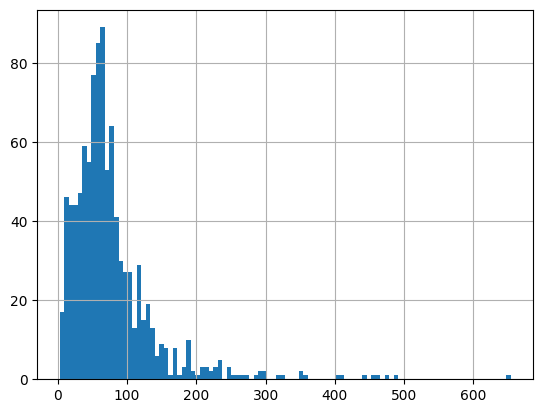

In [25]:
seq_len = [len(i.split()) for i in data_normalized.content]
pd.Series(seq_len).hist(bins = 100)
plt.show()

In [26]:
print(max(seq_len), min(seq_len))

654 3


In [27]:
word = set()
for text in data_normalized.content:
  for i in text.split(" "):
    word.add(i)

print(len(word))
print(word)

2952
{'', 'nể', 'hầu', 'ủi', '1cuốn', 'phẳng', 'giảng', 'dùng', '3k', 'khẳng', 'mẫu', 'xước', 'dẫu', 'ng', '235', 'gyêúp', 'kí', 'đom', 'bạt', 'trộm', 'thì', 'viêc', 'chả', 'thẳng', 'vua', 'phái', 'nhanhcard', 'phản', 'ẩu', 'xò', 'phát', 'hy', 'hỏi', 'phác', 'xoá', 'vê', 'làn', 'bước', '30p', 'chối', 'rỗng', 'ví', 'ạa', 'đè', 'phê', 'lắm', '5', 'chấn', 'loa', 'siêu', 'vân', 'hương', 'cành', 'nguyên', 'luyện', 'giùm', 'hiếp', 'thả', 'gũi', 'hoa', 'cẩm', 'cầu', 'cháu', 'cáp', 'bufet', 'chàng', 'nham', 'hãy', 'tre', 'suông', 'bim', 'quanh', 'gần', 'le', 'jk', 'vải', 'trong', 'quốc', 'thía', 'nhằn', 'thoắt', 'cậu', 'hiên', 'hét', 'xoay', 'gặt', '464', 'ngườiviệt', 'mơ', 'thiêu', 'dể', 'lăng', 'bê', 'một', 'góc', 'tiếc', 'vè', 'giận', '1l', 'lịch', 'quý', 'chênh', 'bí', 'new', 'pdf', 'ngỡ', 'thuận', 'one', 'ngăn', 'cận', 'rosietóm', 'chức', 'trơn', 'nản', 'lĩnh', 'phụ', 'đam', 'be', 'đầm', 'hiểu', 'fa', 'viên9', 'mụ', 'chân', '400k', 'nọ', 'xây', 'khồn', 'xinh', 'chuyển', 'real', 'quăng', '

In [28]:
vocab_size = 4500
max_comment_length = 500
embedding_dims = 50
#embedding_dims = 200

In [29]:
X = data_normalized['content'].values
Y = data_normalized['sentiment'].values

In [30]:
tokenizer = Tokenizer(num_words=vocab_size, split = ' ')
tokenizer.fit_on_texts(X)
X = tokenizer.texts_to_sequences(X)
X = pad_sequences(X, maxlen=max_comment_length)

In [31]:
X

array([[  0,   0,   0, ..., 253,  60,  53],
       [  0,   0,   0, ..., 208,  33,  92],
       [  0,   0,   0, ..., 880, 108, 211],
       ...,
       [  0,   0,   0, ...,  44, 295, 224],
       [  0,   0,   0, ...,  54, 173,  12],
       [  0,   0,   0, ..., 571, 228,   2]], dtype=int32)

In [32]:
Y

array([ 0,  1,  1,  0,  1,  0, -1, -1,  1,  1, -1,  1,  0, -1,  0,  0,  1,
       -1, -1,  0, -1,  1,  0,  1,  0,  0,  0,  1,  1, -1, -1, -1,  1, -1,
        0,  1, -1,  1, -1,  0,  0, -1,  1,  1, -1,  0, -1,  1,  1,  1,  0,
        0,  0,  0, -1, -1,  0,  1,  1, -1, -1, -1, -1,  0,  1,  0,  1,  1,
        0, -1,  1,  0, -1, -1,  1,  0,  1,  1,  1, -1,  1,  1,  0,  1, -1,
       -1,  1, -1,  1,  1,  1, -1,  1,  1, -1,  0, -1,  1, -1,  1,  0,  1,
        0, -1,  0, -1, -1, -1,  1,  1,  1,  1,  0,  1,  0,  1,  1,  0,  0,
        1,  0,  0,  1,  1, -1,  1, -1,  0, -1,  1,  1,  0,  0,  0, -1, -1,
        1,  1,  0, -1, -1, -1,  1, -1,  0, -1, -1,  0,  0, -1, -1,  1, -1,
       -1, -1, -1,  0, -1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1, -1, -1,
        1,  1,  0, -1, -1, -1, -1,  1,  1,  1,  0,  0,  1,  1,  0,  0,  0,
        1,  1,  1,  1,  1, -1,  1,  0,  0, -1,  1,  1,  1,  1,  0,  0,  1,
        1, -1, -1,  1, -1,  1,  0,  1, -1,  0,  1,  1,  1, -1,  0,  1,  0,
       -1,  1,  1,  1, -1

In [33]:
Y = pd.get_dummies(Y).values
Y

array([[0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       ...,
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0]], dtype=uint8)

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(787, 500) (197, 500) (787, 3) (197, 3)


In [36]:
'''model = Sequential()
model.add(Embedding(vocab_size, embedding_dims, input_length = X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout = 0.2, recurrent_dropout = 0.2))
model.add(Dense(3, activation = 'softmax'))'''

"model = Sequential()\nmodel.add(Embedding(vocab_size, embedding_dims, input_length = X.shape[1]))\nmodel.add(SpatialDropout1D(0.2))\nmodel.add(LSTM(100, dropout = 0.2, recurrent_dropout = 0.2))\nmodel.add(Dense(3, activation = 'softmax'))"

In [37]:
model = Sequential()
model.add(Embedding(vocab_size, embedding_dims, input_length = X.shape[1]))
model.add(SpatialDropout1D(0.5))
model.add(LSTM(256, dropout = 0.5, recurrent_dropout = 0.5))
model.add(Dense(3, activation = 'softmax'))

In [38]:
'''model = Sequential()
model.add(Embedding(vocab_size, embedding_dims, input_length = X.shape[1]))
model.add(LSTM(128, return_sequences = True))
model.add(Dropout(0.5))
model.add(LSTM(128))
model.add(Dense(64, activation = 'relu', kernel_regularizer=regularizers.l2(0.01),
                                         activity_regularizer=regularizers.l1(0.01)))
model.add(Dense(3, activation = 'softmax'))'''

"model = Sequential()\nmodel.add(Embedding(vocab_size, embedding_dims, input_length = X.shape[1]))\nmodel.add(LSTM(128, return_sequences = True))\nmodel.add(Dropout(0.5))\nmodel.add(LSTM(128))\nmodel.add(Dense(64, activation = 'relu', kernel_regularizer=regularizers.l2(0.01),\n                                         activity_regularizer=regularizers.l1(0.01)))\nmodel.add(Dense(3, activation = 'softmax'))"

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 50)           225000    
                                                                 
 spatial_dropout1d (SpatialD  (None, 500, 50)          0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 256)               314368    
                                                                 
 dense (Dense)               (None, 3)                 771       
                                                                 
Total params: 540,139
Trainable params: 540,139
Non-trainable params: 0
_________________________________________________________________


In [40]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [41]:
model.fit(X_train, y_train, epochs = 10, batch_size = 32, validation_split = 0.2)

Epoch 1/10
20/20 [==============================] - 72s 3s/step - loss: 1.0977 - accuracy: 0.3561 - val_loss: 1.0939 - val_accuracy: 0.3987
Epoch 2/10
20/20 [==============================] - 51s 3s/step - loss: 1.1265 - accuracy: 0.4404 - val_loss: 1.0860 - val_accuracy: 0.4114
Epoch 3/10
20/20 [==============================] - 51s 3s/step - loss: 1.0657 - accuracy: 0.4722 - val_loss: 1.0653 - val_accuracy: 0.4304
Epoch 4/10
20/20 [==============================] - 54s 3s/step - loss: 0.9835 - accuracy: 0.5994 - val_loss: 1.0180 - val_accuracy: 0.5380
Epoch 5/10
20/20 [==============================] - 49s 2s/step - loss: 0.8738 - accuracy: 0.6359 - val_loss: 0.9256 - val_accuracy: 0.5443
Epoch 6/10
20/20 [==============================] - 52s 3s/step - loss: 0.7497 - accuracy: 0.6598 - val_loss: 0.8760 - val_accuracy: 0.5886
Epoch 7/10
20/20 [==============================] - 49s 2s/step - loss: 0.6696 - accuracy: 0.7329 - val_loss: 0.9034 - val_accuracy: 0.5633
Epoch 8/10
20/20 [==

In [42]:
'''early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=1, mode='auto')
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])'''

"early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=1, mode='auto')\nhistory = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])"

In [43]:
from sklearn.metrics import classification_report

In [44]:
# y_pred = model.predict(X_test)
# y_pred = np.argmax(y_pred, axis = 1)

In [45]:
# y_pred = pd.get_dummies(y_pred)

In [46]:
# print(classification_report(y_test, y_pred, digits = 3))

In [47]:
# Evaluate model on test data
score = model.evaluate(X_test, y_test, verbose=1)

# Calculate precision, recall, F1 score
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_test_argmax = np.argmax(y_test, axis=1)

print('Precision:', precision_score(y_test_argmax, y_pred, average='weighted'))
print('Recall:', recall_score(y_test_argmax, y_pred, average='weighted'))
print('F1 score:', f1_score(y_test_argmax, y_pred, average='weighted'))

7/7 [==============================] - 1s 140ms/step
Precision: 0.5729608370923006
Recall: 0.5583756345177665
F1 score: 0.563805793311369
